In [71]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

## Load the Data

We will use the [Alphabet Inc.(Google)](https://finance.yahoo.com/quote/GOOG/history?p=GOOG) dataset. The time period used is `('2004-08-19', '2020-12-24')`.

In [72]:
df = pd.read_csv('Stocks\GOOG.csv')

## Quick look at data

In [73]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-22,61.799500,62.454498,61.415501,62.442001,62.442001,16146000
1,2019-04-23,62.534500,63.450001,62.319000,63.227501,63.227501,26398000
2,2019-04-24,63.206001,63.400501,62.750000,62.799999,62.799999,20376000
3,2019-04-25,63.238499,63.370399,62.601501,63.172501,63.172501,22146000
4,2019-04-26,63.450001,63.653500,63.015999,63.609001,63.609001,24828000


In [74]:
# Extract "Date" and "Close" feature colums from the dataframe. 
df = df[['Date', 'Close', 'Volume']]

In [75]:
# Concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1183 non-null   object 
 1   Close   1183 non-null   float64
 2   Volume  1183 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 27.9+ KB


**Data Time Period**

In [76]:
df['Date'].min(), df['Date'].max()

('2019-04-22', '2023-12-29')

## Visualize the data

In [77]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close price'))
fig.update_layout(showlegend=True, title='Google Stock Price 2019-2024')
fig.show()
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df['Date'], y=df['Volume'], name='Volume'))
fig2.update_layout(showlegend=True, title='Google Stock Price 2019-2024')
fig2.show()

## Data Preprocessing

In [78]:
df[['Close','Volume']].head()

,Close,Volume
0,62.442001,16146000
1,63.227501,26398000
2,62.799999,20376000
3,63.172501,22146000
4,63.609001,24828000


In [79]:
len(df)

1183

In [80]:
scaler = StandardScaler()
scaler = scaler.fit(df[['Close','Volume']])
scaled_train = scaler.transform(df[['Close','Volume']])
#train_df = pd.DataFrame(scaled_train,columns = ['Close','Volume'])

In [81]:
scaled_train[0:5]

array([[-1.3374812 , -1.00458351],
       [-1.31047676, -0.21576535],
       [-1.32517371, -0.67911523],
       [-1.31236759, -0.54292638],
       [-1.2973613 , -0.33656564]])

In [82]:
def generate_sequences(data, window_size):
  _l = len(data) 
  Xs = []
  Ys = []
  for i in range(0, (_l - window_size)):
    Xs.append(data[i:i+window_size,:])
    Ys.append(data[i+window_size,:])
  return np.array(Xs), np.array(Ys)

In [83]:
TIME_STEPS = 1
X_train, Y_train= generate_sequences(scaled_train, TIME_STEPS)
print("Training input shape: ", X_train.shape)
print("Training output shape: ", Y_train.shape)

Training input shape:  (1182, 1, 2)
Training input shape:  (1182, 2)


In [84]:
X_train[0]

array([[-1.3374812 , -1.00458351]])

In [85]:
Y_train[0]

array([-1.31047676, -0.21576535])

In [86]:
# set seed to regenerate same sequence of random numbers. 
np.random.seed(21)
tf.random.set_seed(21)

## Build a model

In [87]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(X_train.shape[2]))
#model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 1, 128)            67072     
                                                                 
 lstm_19 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 2)                 130       
                                                                 
Total params: 116,610
Trainable params: 116,610
Non-trainable params: 0
_________________________________________________________________


## Train Model

In [88]:
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    #callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
                    shuffle=False)

Epoch 1/100
30/30 [==============================] - 14s 75ms/step - loss: 1.0522 - val_loss: 0.7609
Epoch 2/100
30/30 [==============================] - 0s 13ms/step - loss: 0.9988 - val_loss: 0.7246
Epoch 3/100
30/30 [==============================] - 0s 13ms/step - loss: 0.9010 - val_loss: 0.6423
Epoch 4/100
30/30 [==============================] - 0s 13ms/step - loss: 0.7054 - val_loss: 0.4804
Epoch 5/100
30/30 [==============================] - 0s 12ms/step - loss: 0.5071 - val_loss: 0.2985
Epoch 6/100
30/30 [==============================] - 0s 12ms/step - loss: 0.4137 - val_loss: 0.2662
Epoch 7/100
30/30 [==============================] - 0s 12ms/step - loss: 0.3737 - val_loss: 0.2594
Epoch 8/100
30/30 [==============================] - 0s 13ms/step - loss: 0.3569 - val_loss: 0.2575
Epoch 9/100
30/30 [==============================] - 0s 12ms/step - loss: 0.3486 - val_loss: 0.2549
Epoch 10/100
30/30 [==============================] - 0s 11ms/step - loss: 0.3536 - val_loss: 0.254

#### Plot Training - Validation loss

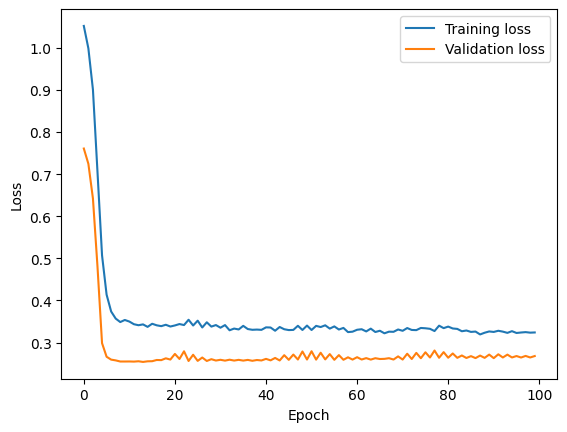

In [89]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [90]:
model.save('saved_models/lstm_multi_no_window.h5')

In [91]:
new_df = pd.read_csv('Stocks\Test.csv')
new_df = new_df[['Date','Close','Volume']]
scaled_new_test = scaler.transform(new_df[['Close','Volume']])

X_new, Y_new = generate_sequences(scaled_new_test, TIME_STEPS)
new_test_pred = model.predict(X_new, verbose=1)


3/3 [==============================] - 1s 9ms/step


In [92]:
print(scaled_new_test.shape)
print(new_test_pred.shape)
print(X_new.shape)

(76, 2)
(75, 2)
(75, 1, 2)


In [93]:
new_test_pred_seq, _ = generate_sequences(new_test_pred, TIME_STEPS)
print(new_test_pred_seq.shape)

(74, 1, 2)


In [94]:
import shap
import tensorflow as tf
user_model = tf.keras.models.load_model('saved_models\lstm_multi_no_window.h5')

In [95]:
explainer = shap.GradientExplainer(user_model, X_new)
shap_values = explainer.shap_values(X_new)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [96]:
print(shap_values[0].shape) # Close Price
print(shap_values[1].shape) # Volume
print(len(shap_values))
print(X_new.shape)

(75, 1, 2)
(75, 1, 2)
2
(75, 1, 2)


In [ ]:
[(75, 1, 2), (75, 1, 2)]
[(75, 5, 2), (75, 5, 2)]

In [97]:
print(shap_values)

[array([[[-0.25416121,  0.0065222 ]],

       [[-0.22796683, -0.00457593]],

       [[-0.32062113, -0.01260762]],

       [[-0.3245708 , -0.02199069]],

       [[-0.25202531, -0.01023592]],

       [[-0.13753034, -0.00119066]],

       [[-0.109788  , -0.01660409]],

       [[-0.11482514, -0.01318085]],

       [[-0.1195955 , -0.03080379]],

       [[-0.10883766, -0.00142078]],

       [[-0.14628518, -0.00917326]],

       [[-0.04842742, -0.00139339]],

       [[ 0.03717251,  0.01747288]],

       [[ 0.02067265,  0.0054775 ]],

       [[ 0.0702204 , -0.02948122]],

       [[ 0.11638496, -0.00204682]],

       [[ 0.2457888 ,  0.00284337]],

       [[ 0.24264652, -0.00120751]],

       [[ 0.29183868,  0.00070513]],

       [[ 0.24586895,  0.01636726]],

       [[-0.16331369,  0.00183199]],

       [[-0.16129121,  0.01555143]],

       [[-0.14186577,  0.01441017]],

       [[-0.05090053,  0.02281768]],

       [[-0.02842236,  0.00780591]],

       [[-0.01042535,  0.00831107]],

       [[ 0

In [98]:
scaled_new_test[TIME_STEPS:].shape

(75, 2)

In [99]:
last_idx_arr = []
for item in shap_values[0]:
    #print(item[-1])
    last_idx_arr.append(item[-1])
last_idx_arr = np.array(last_idx_arr)
print(last_idx_arr.shape)

(75, 2)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


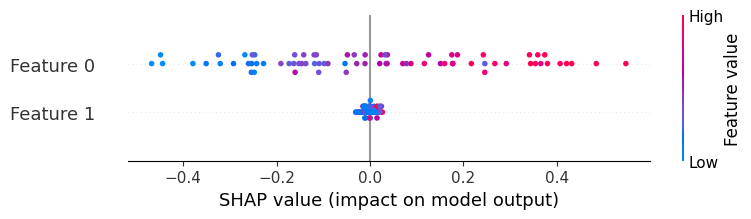

In [100]:
shap.summary_plot(last_idx_arr, scaled_new_test[TIME_STEPS:])

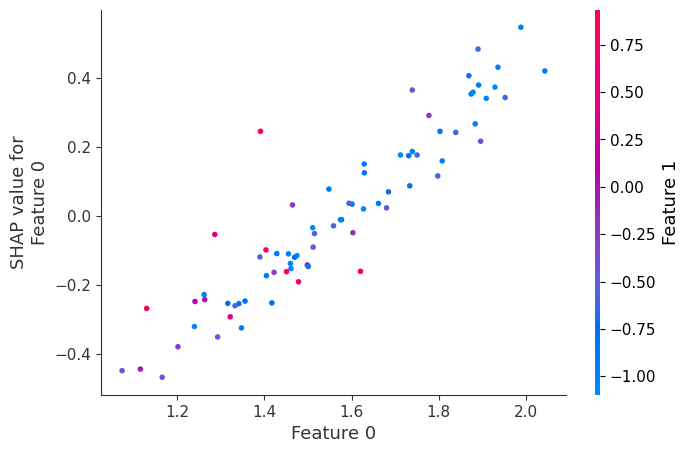

In [101]:
shap.dependence_plot(0, last_idx_arr, scaled_new_test[TIME_STEPS:]) 

In [102]:
#shap.plots.beeswarm(explainer) 

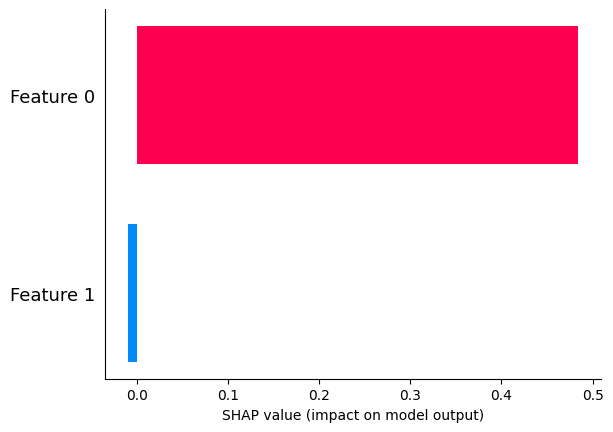

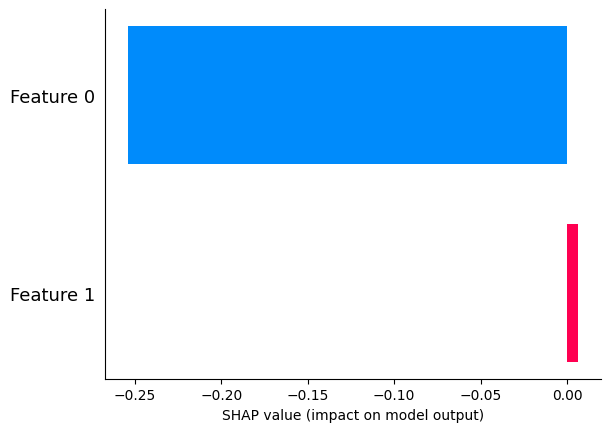

In [103]:
shap.bar_plot(last_idx_arr[70])
shap.bar_plot(last_idx_arr[0])

In [104]:
last_idx_arr2 = []
for item in shap_values[1]:
    #print(item[-1])
    last_idx_arr2.append(item[-1])
last_idx_arr2 = np.array(last_idx_arr2)
print(last_idx_arr2.shape)

(75, 2)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


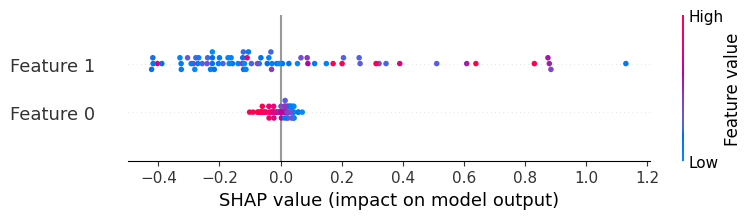

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


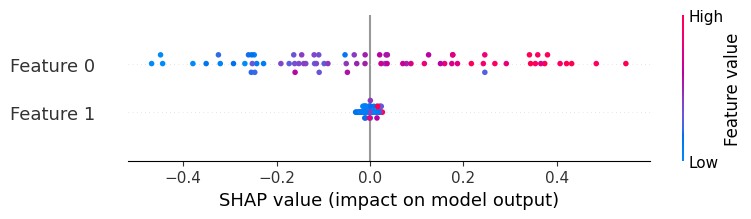

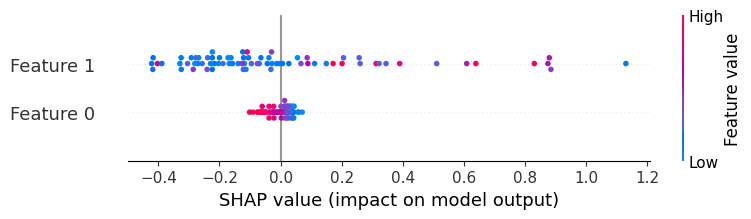

In [110]:
shap.summary_plot(last_idx_arr, scaled_new_test[TIME_STEPS:]) #Close Price
shap.summary_plot(last_idx_arr2, scaled_new_test[TIME_STEPS:]) #Volume

In [107]:
pred_dict = {
    'Predicted_Close': new_test_pred[:, 0],
    'Predicted_Volume': new_test_pred[:, 1],
    'Actual_Close': Y_new[:, 0],
    'Actual_Volume': Y_new[:, 1],
}

In [108]:
pred_df = pd.DataFrame(pred_dict)
pred_df.head()

,Predicted_Close,Predicted_Volume,Actual_Close,Actual_Volume
0,1.214679,-0.486855,1.341236,-0.786966
1,1.233795,-0.552172,1.261477,-0.842442
2,1.149835,-0.588594,1.239131,-1.059428
3,1.111297,-0.744742,1.347080,-0.889223
4,1.230247,-0.629166,1.416869,-0.740385


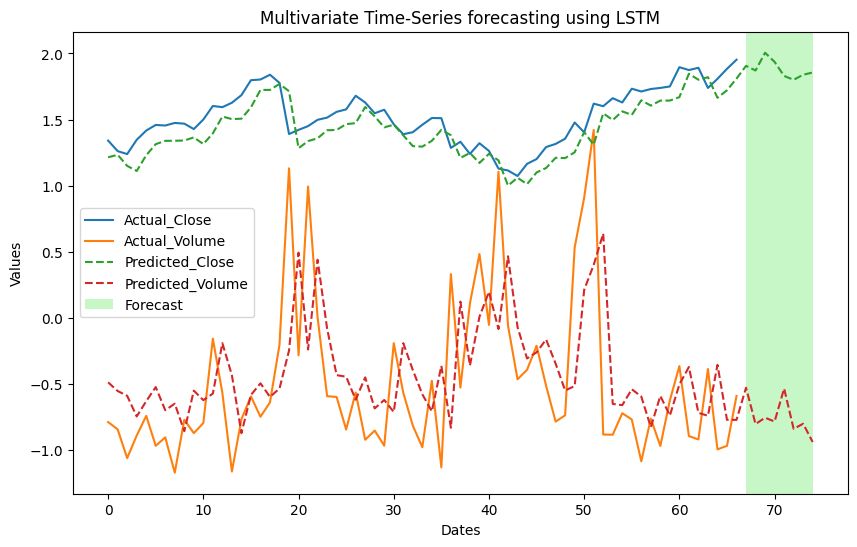

In [109]:
fig, ax = plt.subplots(figsize=(10, 6))
#  highlight the  forecast
highlight_start = int(len(pred_df) * 0.9)  
highlight_end = len(pred_df) - 1  # Adjusted to stay within bounds
# Plot the actual values
plt.plot(pred_df[['Actual_Close', 'Actual_Volume']][:highlight_start], label=['Actual_Close', 'Actual_Volume'])
 
# Plot predicted values with a dashed line
plt.plot(pred_df[['Predicted_Close', 'Predicted_Volume']], label=['Predicted_Close', 'Predicted_Volume'], linestyle='--')
 
# Highlight the forecasted portion with a different color
plt.axvspan(pred_df.index[highlight_start], pred_df.index[highlight_end], facecolor='lightgreen', alpha=0.5, label='Forecast')
 
plt.title('Multivariate Time-Series forecasting using LSTM')
plt.xlabel('Dates')
plt.ylabel('Values')
ax.legend()
plt.show()